In [42]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib.image as mpimg
from scipy.ndimage import rotate
from itertools import product
from tqdm import tqdm
from utils import *
from sklearn.preprocessing import minmax_scale

animation.writer = animation.writers['ffmpeg']
plt.rcParams['figure.dpi'] = 900

### Data (solution arrays)

In [2]:
# # Unit is in m/s
# G_moon = 200 # m/s
# altitude = 500. # m
# x_pos = 0. # m? (don't think this really matters)
# entrance_x_vel = 300. # m/s
# pos = (x_pos, altitude)

# Unit is in m/s
# G_moon = 200 # m/s
altitude = 50. # m
x_pos = 5. # m? (don't think this really matters)
entrance_x_vel = 10. # m/s
pos = (x_pos, altitude)
gamma=0

In [3]:
TS, X, Y, XP, YP, UX, UY, TF = lunar_lander(pos, entrance_x_vel, gamma=0, nu=0, t_steps=1000)
print(np.min(Y))

-0.665503158938532


In [4]:
TS, X, Y, XP, YP, UX, UY, TF = lunar_lander(pos, entrance_x_vel, gamma=0, beta=100, nu=5000, t_steps=10000)
print(np.min(Y))

-0.0007099007363656189


### Basic Info Plots 

Final Time: 10.63493805438195
Final Position: (49.907, 0.0)


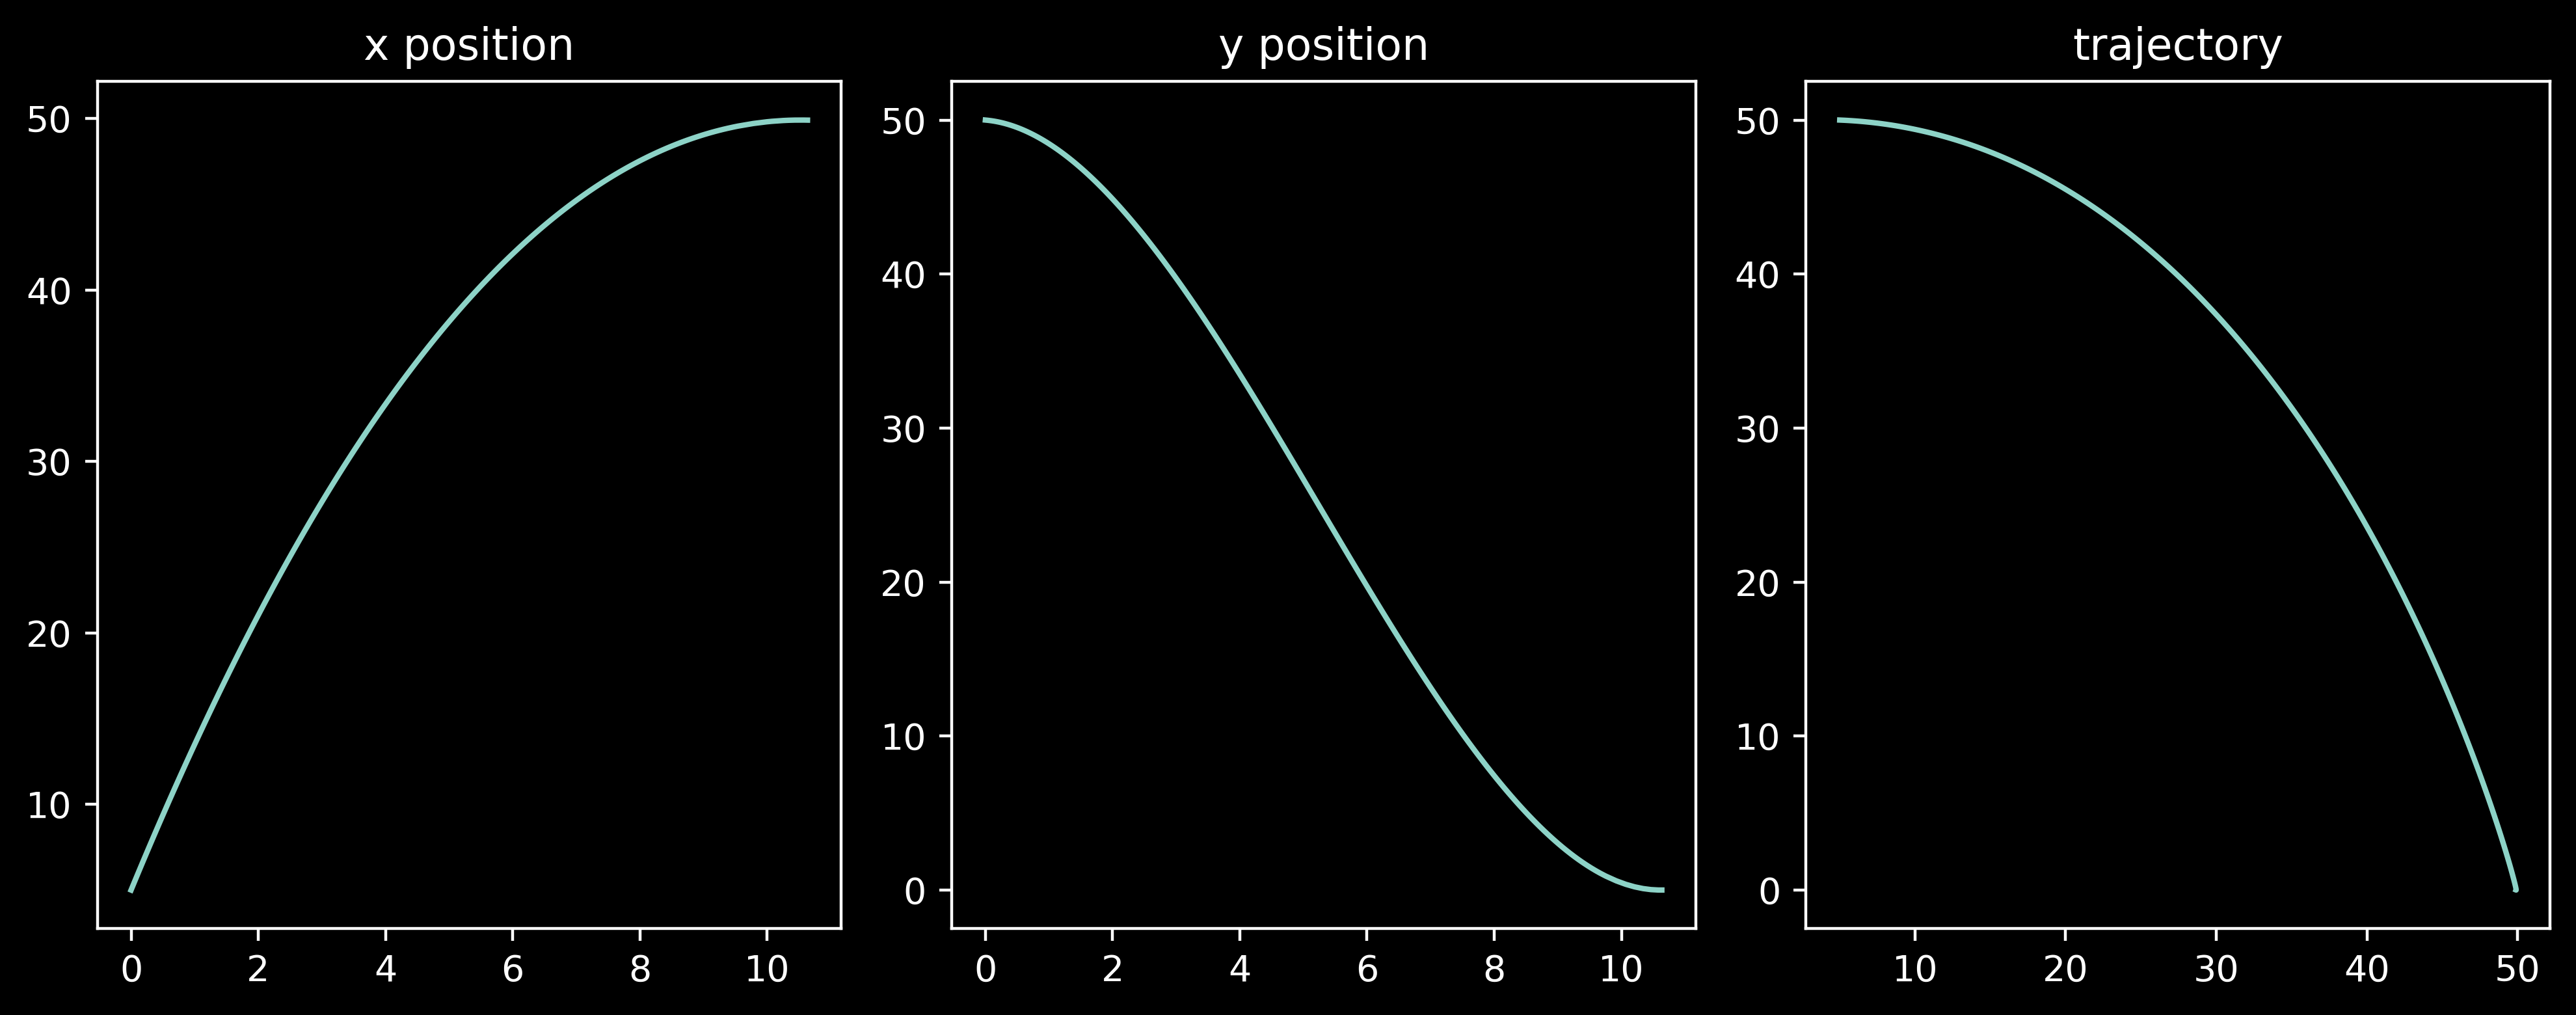

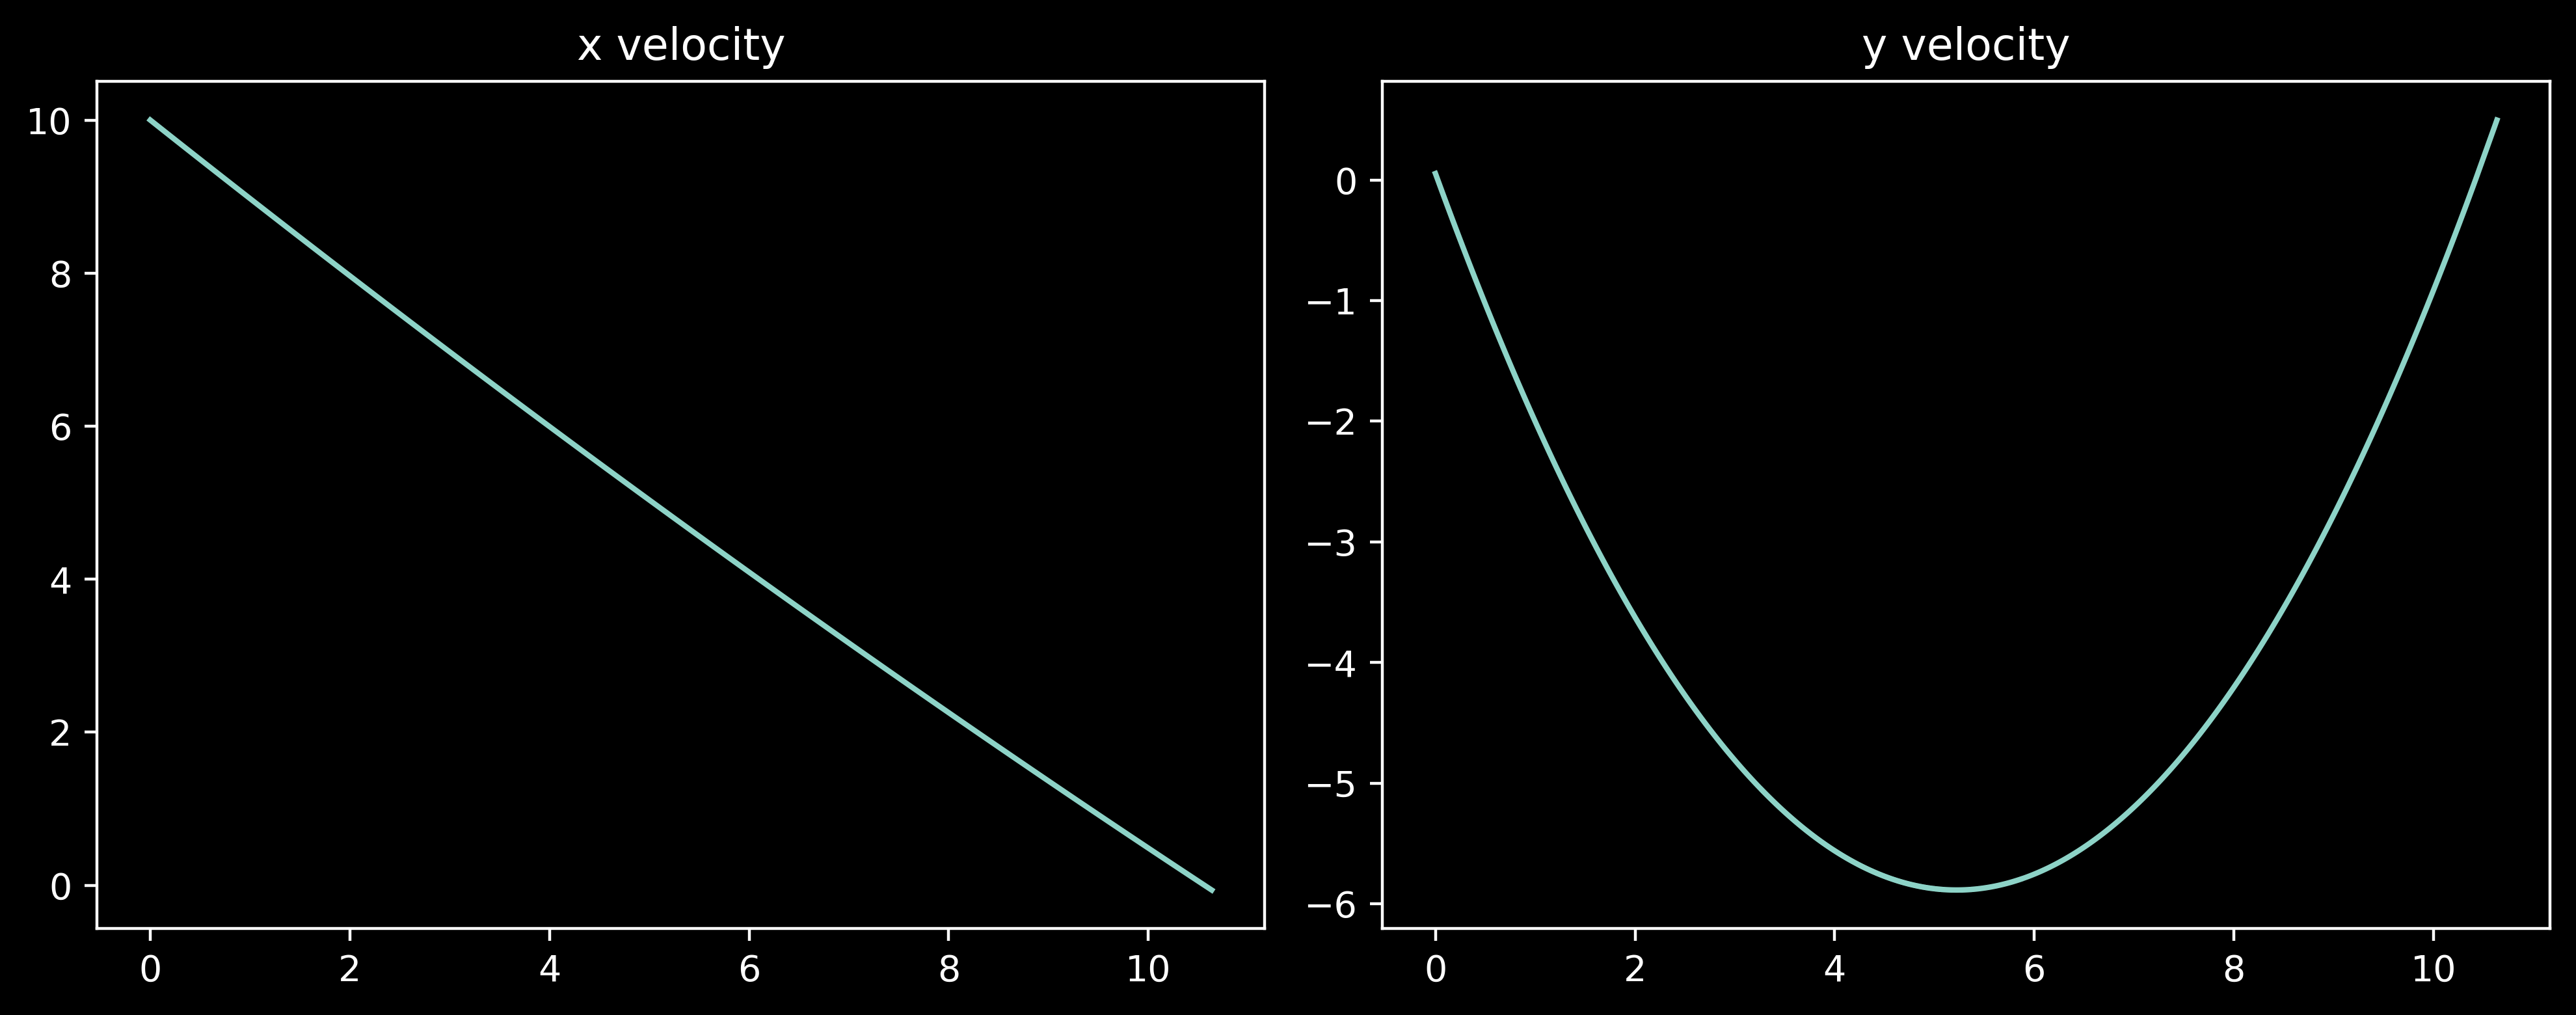

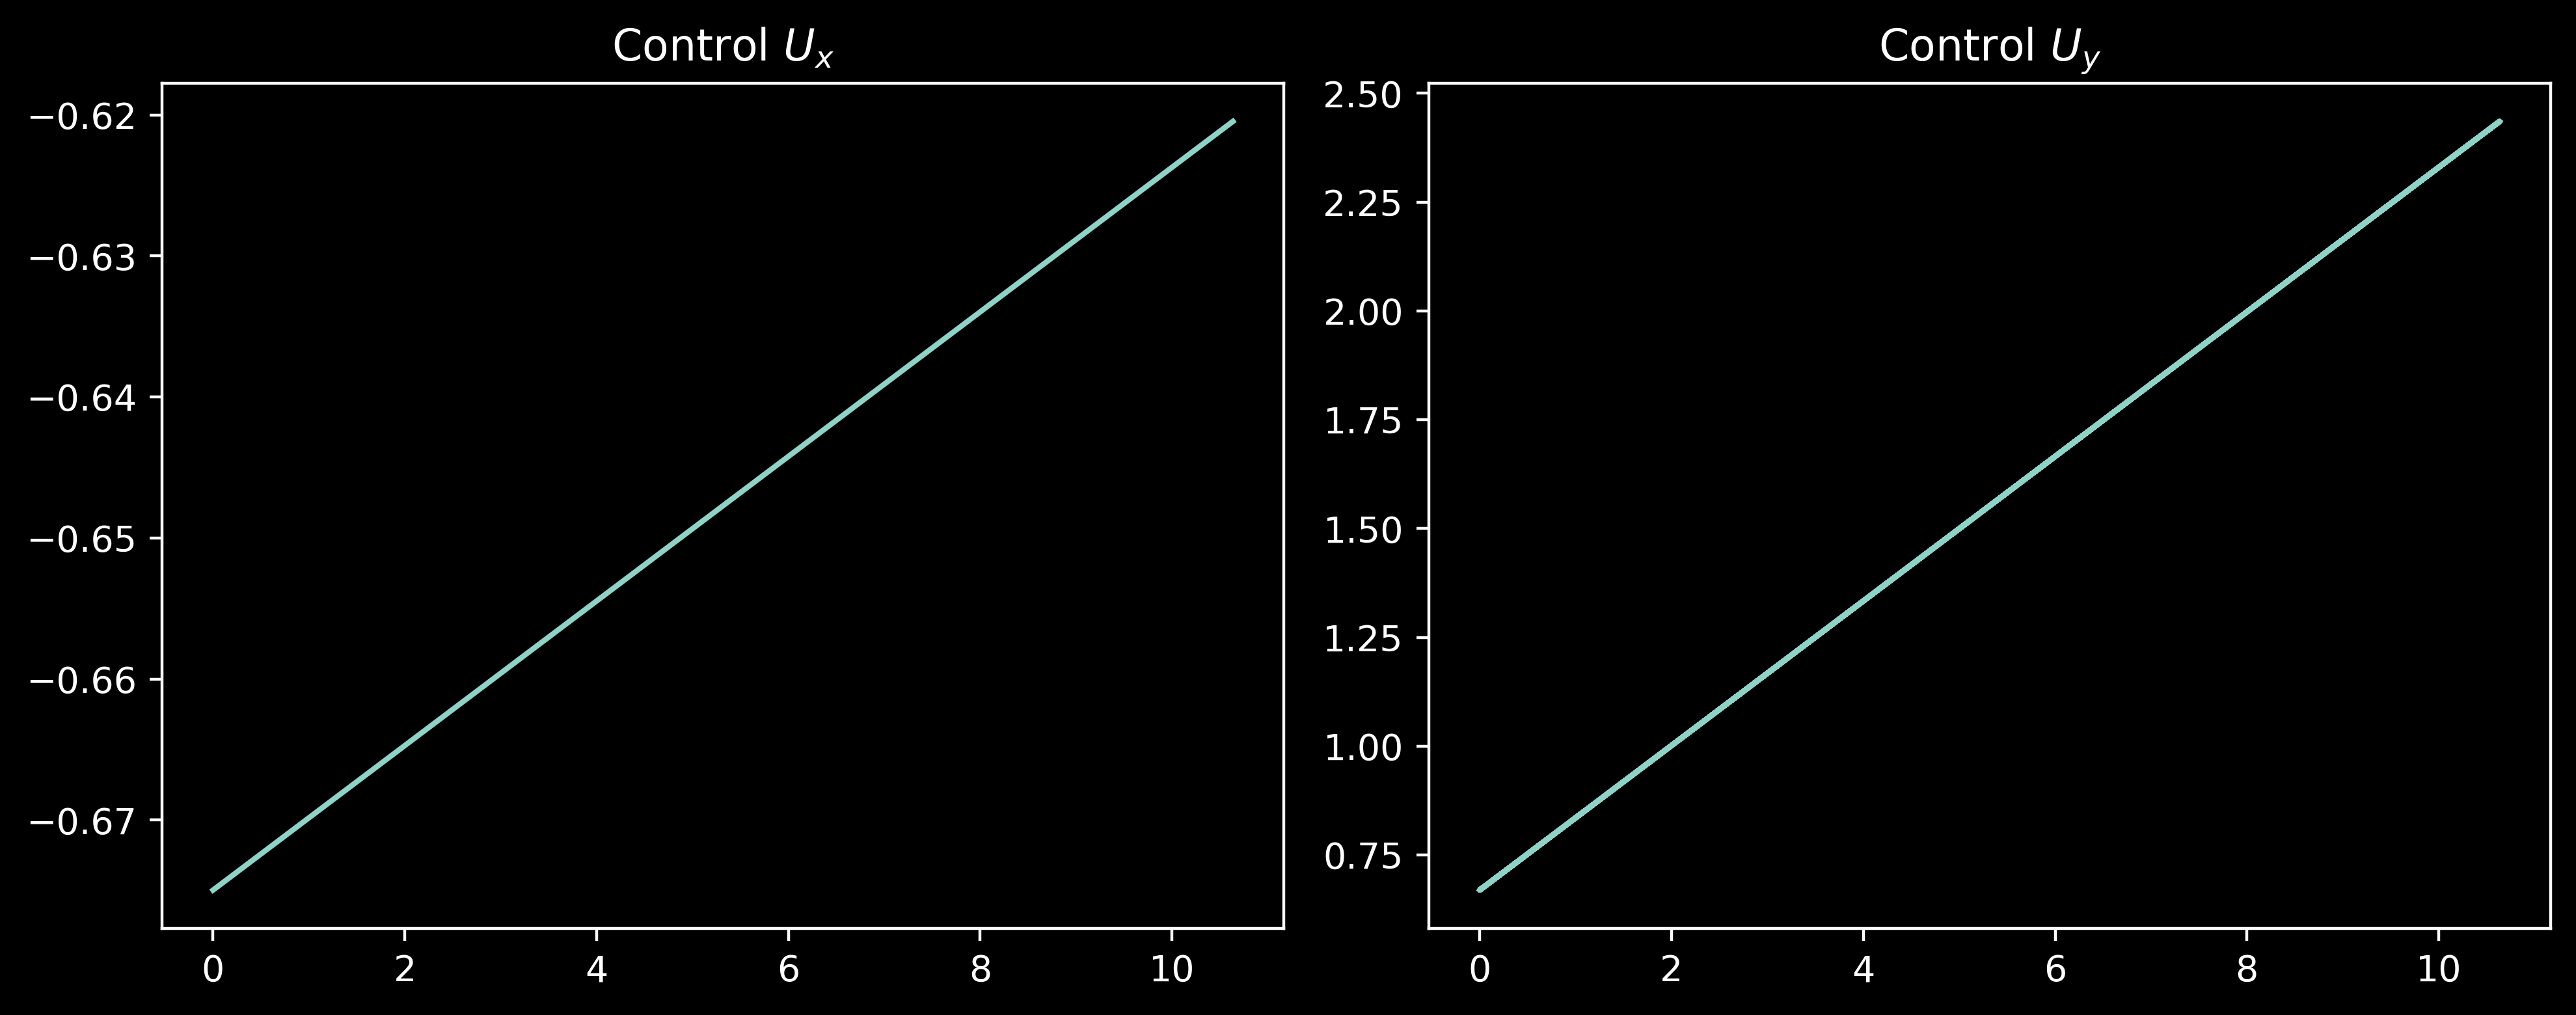

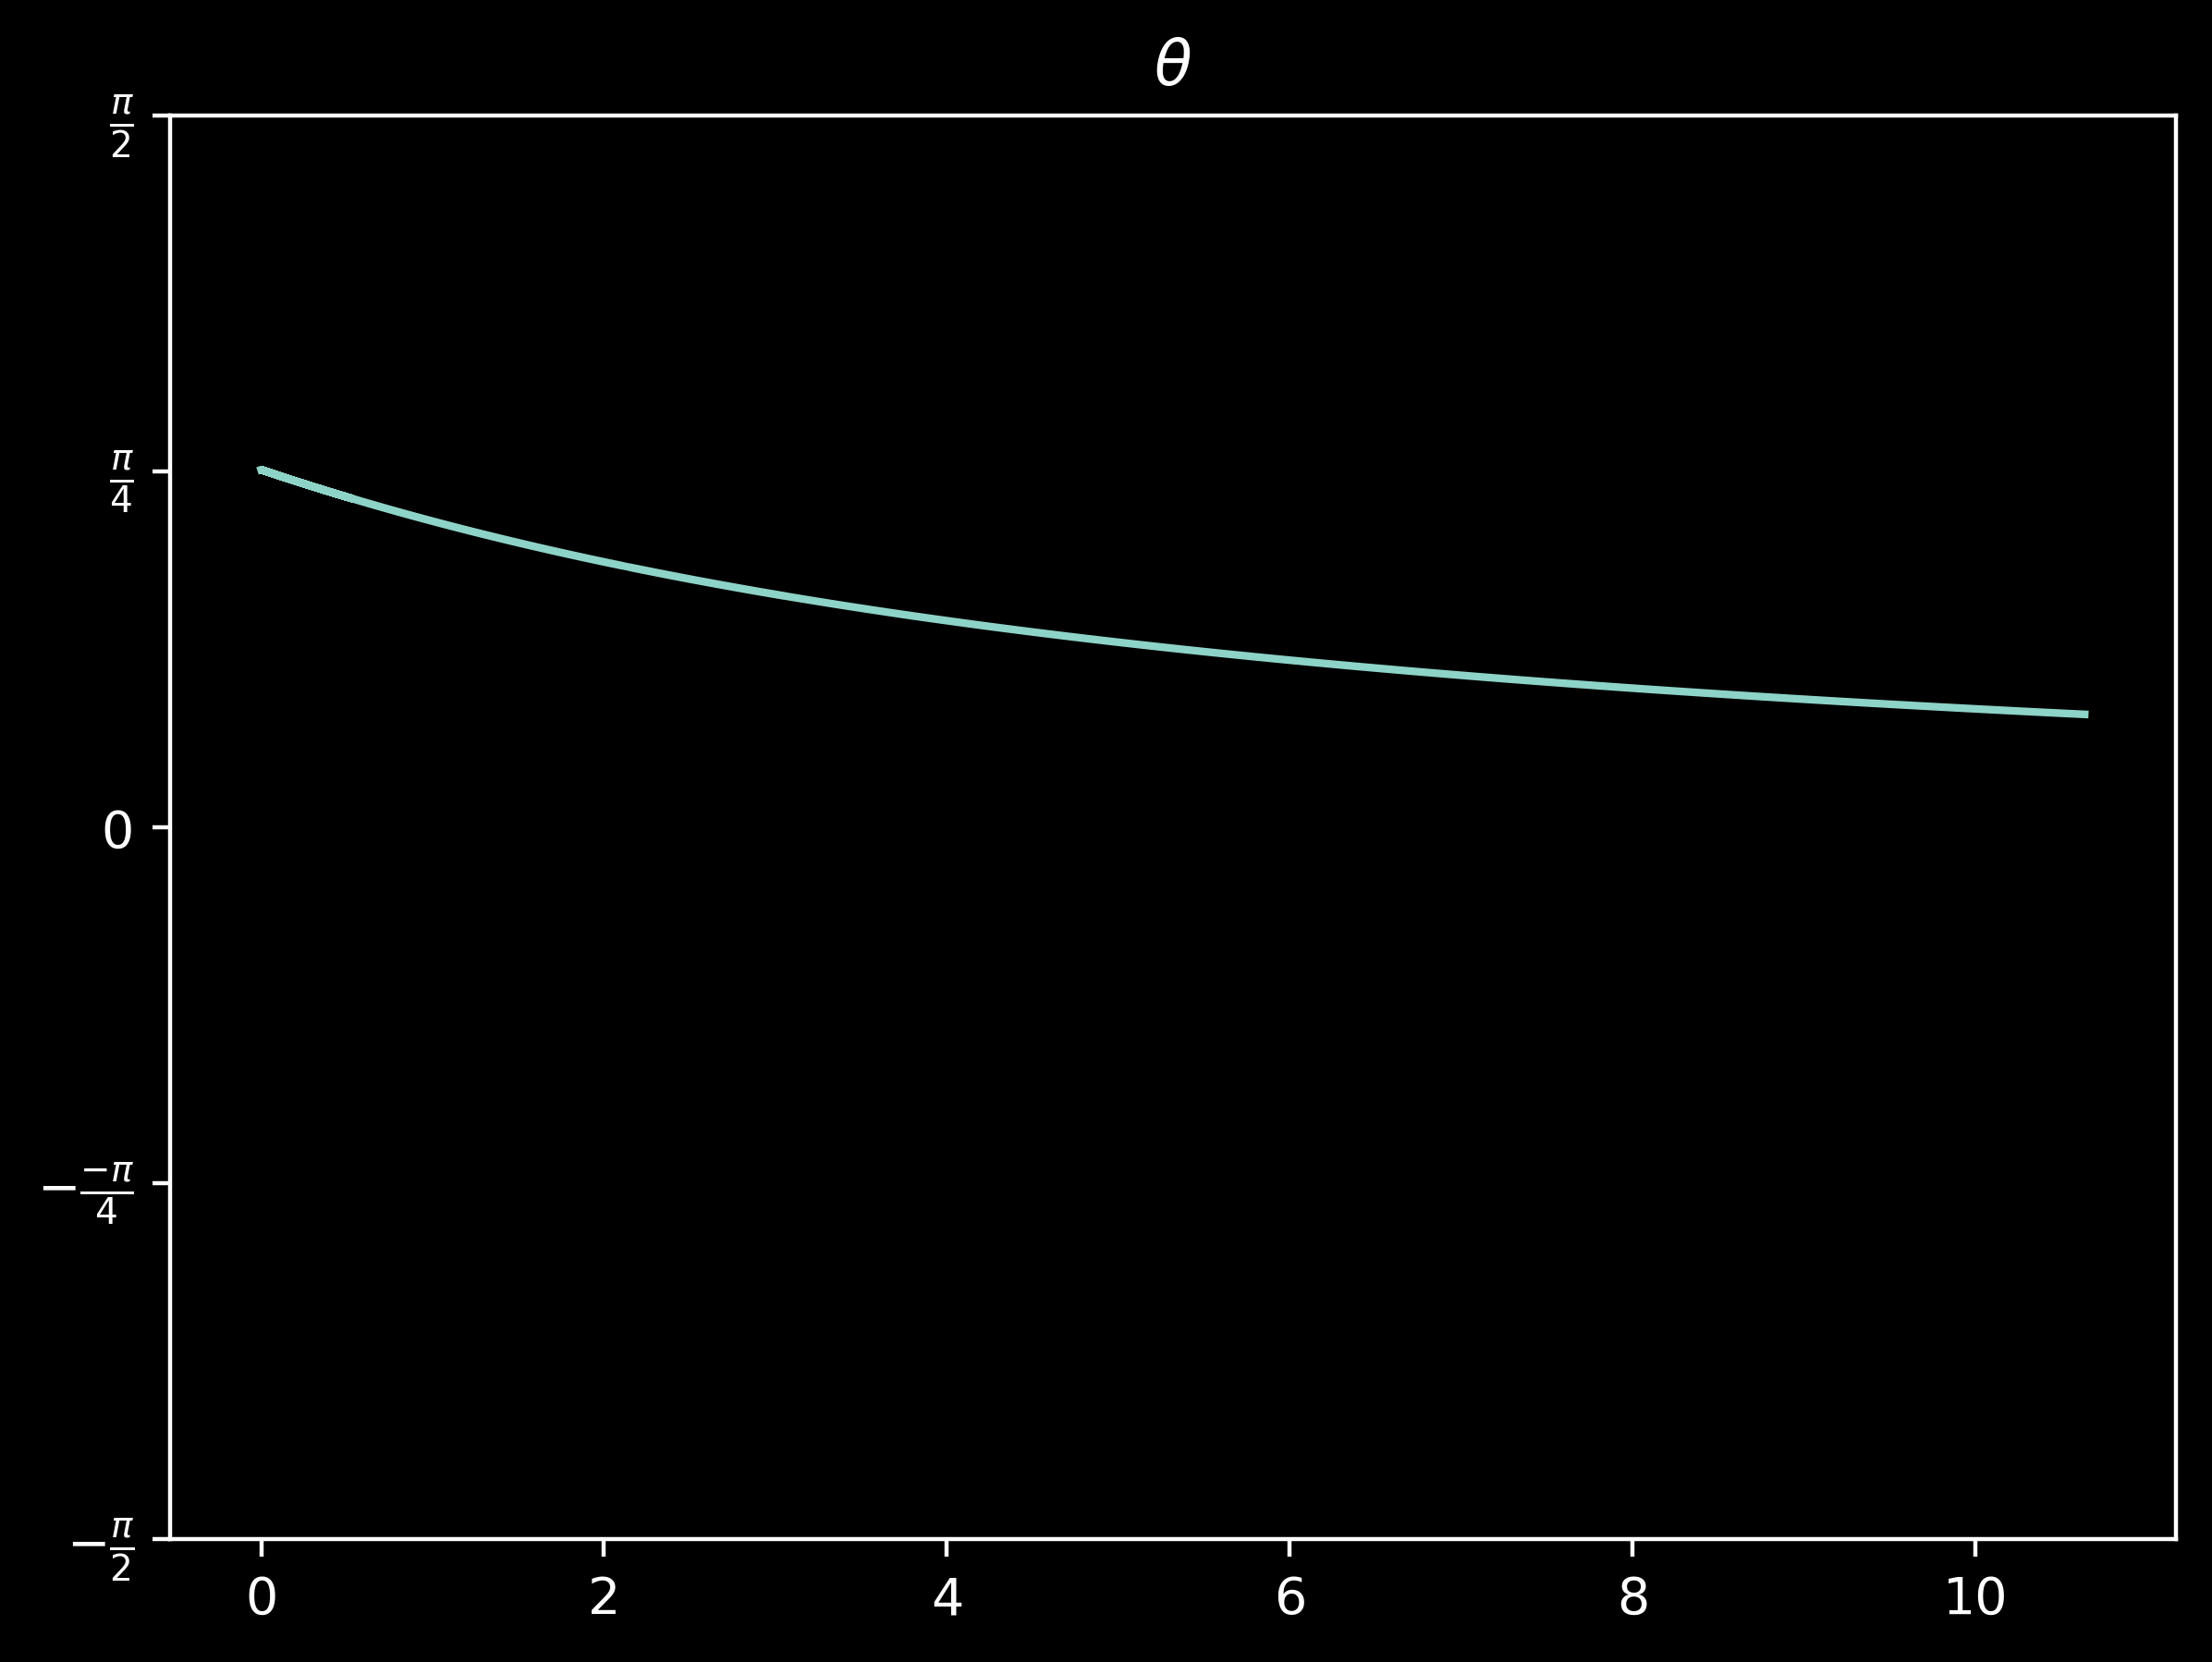

In [5]:
make_plots(TS, X, Y, XP, YP, UX, UY, TF)


### Timelapse Plot

In [6]:
np.linalg.norm(np.vstack([UX, UY]), axis=0).shape

(29998,)

In [7]:
Y.shape

(29998,)

In [15]:
np.linalg.norm(np.vstack([UX, UY]), axis=0)

array([0.95076402, 0.95072057, 0.95092799, ..., 2.5129007 , 2.51318653,
       2.51312596])

In [18]:
a = np.array([0, 1, 2, 3, -4, 10])
minmax_scale(np.linalg.norm(np.vstack([UX, UY]), axis=0), (0, 1))

array([2.78080108e-05, 0.00000000e+00, 1.32747709e-04, ...,
       9.99817063e-01, 1.00000000e+00, 9.99961233e-01])

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

def plot_timelapse(ts=TS, x=X, y=Y, xp=XP, yp=YP, ux=UX, uy=UY, tf=TF, N=7, width=0.3, alpha=None):
    def get_image(filename='./lander.png'):
        arr = plt.imread(filename)
        return arr

    def imshow_affine(ax, z, *args, **kwargs):
        im = ax.imshow(z, *args, **kwargs)
        x1, x2, y1, y2 = im.get_extent()
        im._image_skew_coordinate = (x2, y1)
        return im

    # load the image
    lander = get_image()
    # thrust = get_image('full_lander_thrust.png')[:, 3:]
    thrust = get_image('full_lander_thrust.png')

    radians = np.arctan2(-ux, uy)
    thrust_mag = np.linalg.norm(np.vstack([UX, UY]), axis=0)
    # thrust_mag = minmax_scale(thrust_mag, (0, 1.5))
    print(thrust_mag.shape)
    trajectory = np.array(list(zip(x, y, radians, thrust_mag)))
    idx = np.round(np.linspace(0, len(trajectory) - 1, N)).astype(int)
    
    trajectory = np.array(trajectory)[idx]
    # max_thrust = np.max(thrust_mag)

    # set the width and height of the image
    image_ratio = lander.shape[0]/lander.shape[1]
    lander_height = width*image_ratio # this scales the image so it doesn't get distorted



    # setup the plots
    fig, ax = plt.subplots()
    for i, t in enumerate(trajectory, start=1):

        #     # This allows for fading in time
        # if alpha is None:
        #     alpha=1
        # else:
        #     alpha = 0.8*i/len(trajectory)
            # alpha = .5

        xi, yi, rad, thrust_mag = t

        # stretch thrust based on thrust magnitued (acceleration mag)
        thrust_ratio = thrust_mag*(thrust.shape[0]/thrust.shape[1])
        thrust_height = width*thrust_ratio

        im_thrust = imshow_affine(ax, thrust, interpolation='none',
                                  origin='upper',
                                    extent=[0, width, -thrust_height, 0], clip_on=True,
                                    alpha=alpha)
        # center_x, center_y = width//2, thrust_height//2
        center_x, center_y = 0, 0
        im_thrust_trans = (mtransforms.Affine2D()
                    .rotate_around(center_x, center_y, rad)
                    .translate(xi, yi)
                    + ax.transData)
        im_thrust.set_transform(im_thrust_trans)

        im_lander = imshow_affine(ax, lander, interpolation='none',
                        extent=[0, width, 0, lander_height], clip_on=True,
                        alpha=alpha)
        center_x, center_y = width//2, lander_height//2 
        im_lander_trans = (mtransforms.Affine2D()
                    .rotate_around(center_x, center_y, rad)
                    .translate(xi, yi)
                    + ax.transData)
        im_lander.set_transform(im_lander_trans)

    ax.set_xlim(np.min(trajectory[:, 0]) - 3*width, np.max(trajectory[:, 0]) + 3*width)
    ax.set_ylim(np.min(trajectory[:, 1]) - 3*lander_height, np.max(trajectory[:, 1]) + 3*lander_height)
    plt.show()

(29998,)


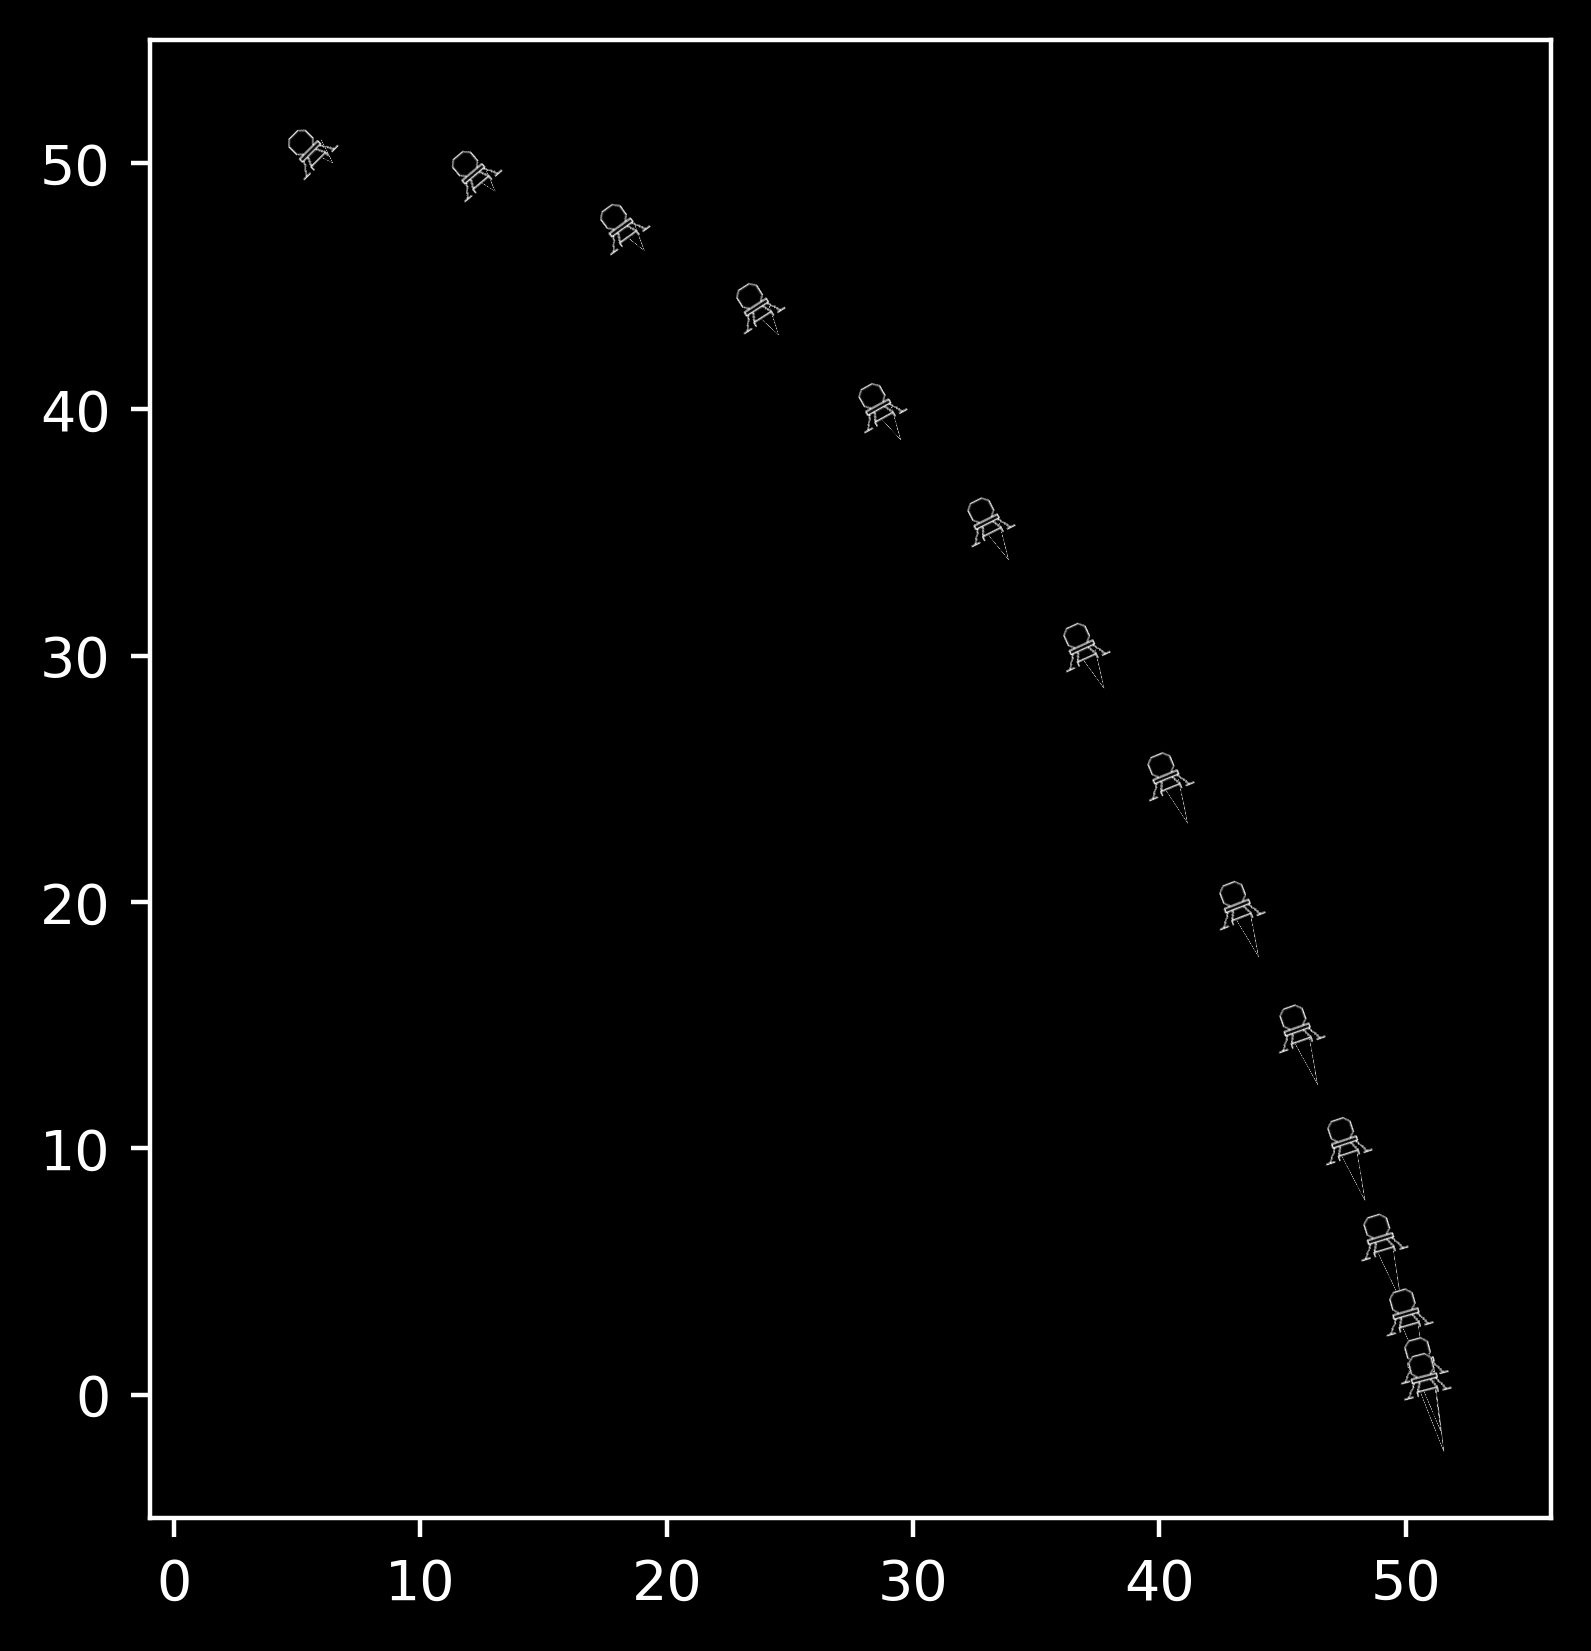

In [34]:
plot_timelapse(width=2, N=15)

In [10]:
def timelapse_test(ts=TS, x=X, y=Y, xp=XP, yp=YP, ux=UX, uy=UY, tf=TF, N=7, width=0.3, alpha=None):
    def get_image(filename='./lander.png'):
        arr = plt.imread(filename)
        return arr

    def imshow_affine(ax, z, *args, **kwargs):
        im = ax.imshow(z, *args, **kwargs)
        x1, x2, y1, y2 = im.get_extent()
        im._image_skew_coordinate = (x2, y1)
        return im

    thrust_mag = np.linalg.norm(np.vstack([UX, UY]), axis=0)
    max_thrust = np.max(thrust_mag)
    print(max_thrust)

    min_thrust = np.min(thrust_mag)
    print(min_thrust)

    trajectory = np.array([[0, 0, 0, 1],
                           [.5, 0, 30, max_thrust/5],
                           [1, 0, 60, max_thrust/5],
                           [1.5, 0, 90, max_thrust/5],
                           [1.5+.5, 0, 30, max_thrust],
                           [1.5+1, 0, 60, max_thrust],
                           [1.5+1.5, 0, 90, max_thrust],
                           [.5, 1, 30, max_thrust/5],
                           [1, 1, 60, max_thrust/5],
                           [1.5, 1, 90, max_thrust/5],
                           [1.5+.5, 1, 30, max_thrust],
                           [1.5+1, 1, 60, max_thrust],
                           [1.5+1.5, 1, 90, max_thrust],
                           [.5, -1, 30, max_thrust/5],
                           [1, -1, 60, max_thrust/5],
                           [1.5, -1, 90, max_thrust/5],
                           [1.5+.5, -1, 30, max_thrust],
                           [1.5+1, -1, 60, max_thrust],
                           [1.5+1.5, -1, 90, max_thrust],])

    # load the image
    lander = get_image()
    thrust = get_image('full_lander_thrust.png')
    # thrust += .4 

    print(f'lander.shape, {lander.shape}')
    print(f'thrust.shape, {thrust.shape}')

    # set the width and height of the image
    lander_ratio = lander.shape[0]/lander.shape[1]
    lander_height = width*lander_ratio # this scales the image so it doesn't get distorted

    # This allows for fading in time
    if alpha is None:
        alpha=1
    else:
        alpha = 0.8*i/len(trajectory)

    # setup the plots
    fig, ax = plt.subplots()
    for i, t in enumerate(trajectory, start=1):
        xi, yi, deg, thrust_mag = t
        # print(xi, yi, deg, thrust)
        thrust_ratio = thrust_mag*(thrust.shape[0]/thrust.shape[1])
        thrust_height = width*thrust_ratio

        im_thrust = imshow_affine(ax, thrust, interpolation='none',
                                  origin='upper',
                                    extent=[0, width, -thrust_height, 0], clip_on=True,
                                    alpha=alpha)
        # center_x, center_y = width//2, thrust_height//2
        center_x, center_y = 0, 0
        # print(center_x, center_y, xi, yi)
        im_thrust_trans = (mtransforms.Affine2D()
                    .rotate_deg_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im_thrust.set_transform(im_thrust_trans)

        # print("thrust info")
        # print(f'center_x:  {center_x}, center_y:  {center_y}, xi: {xi}, yi: {yi}')
        # print(f'width: {width}, height: {thrust_height}')


        im_lander = imshow_affine(ax, lander, interpolation='none',
                        extent=[0, width, 0, lander_height], clip_on=True,
                        alpha=alpha)
        center_x, center_y = width//2, lander_height//2
        # print("lander info")
        # print(f'center_x:  {center_x}, center_y:  {center_y}, xi: {xi}, yi: {yi}')
        # print(f'width: {width}, height: {lander_height}')

        im_lander_trans = (mtransforms.Affine2D()
                    .rotate_deg_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im_lander.set_transform(im_lander_trans)

    ax.set_xlim(0, 3.5)
    ax.set_ylim(-1.5, 1.5)
    plt.show()

2.513186533487605
0.9507205715748784
lander.shape, (213, 255, 4)
thrust.shape, (181, 255, 4)


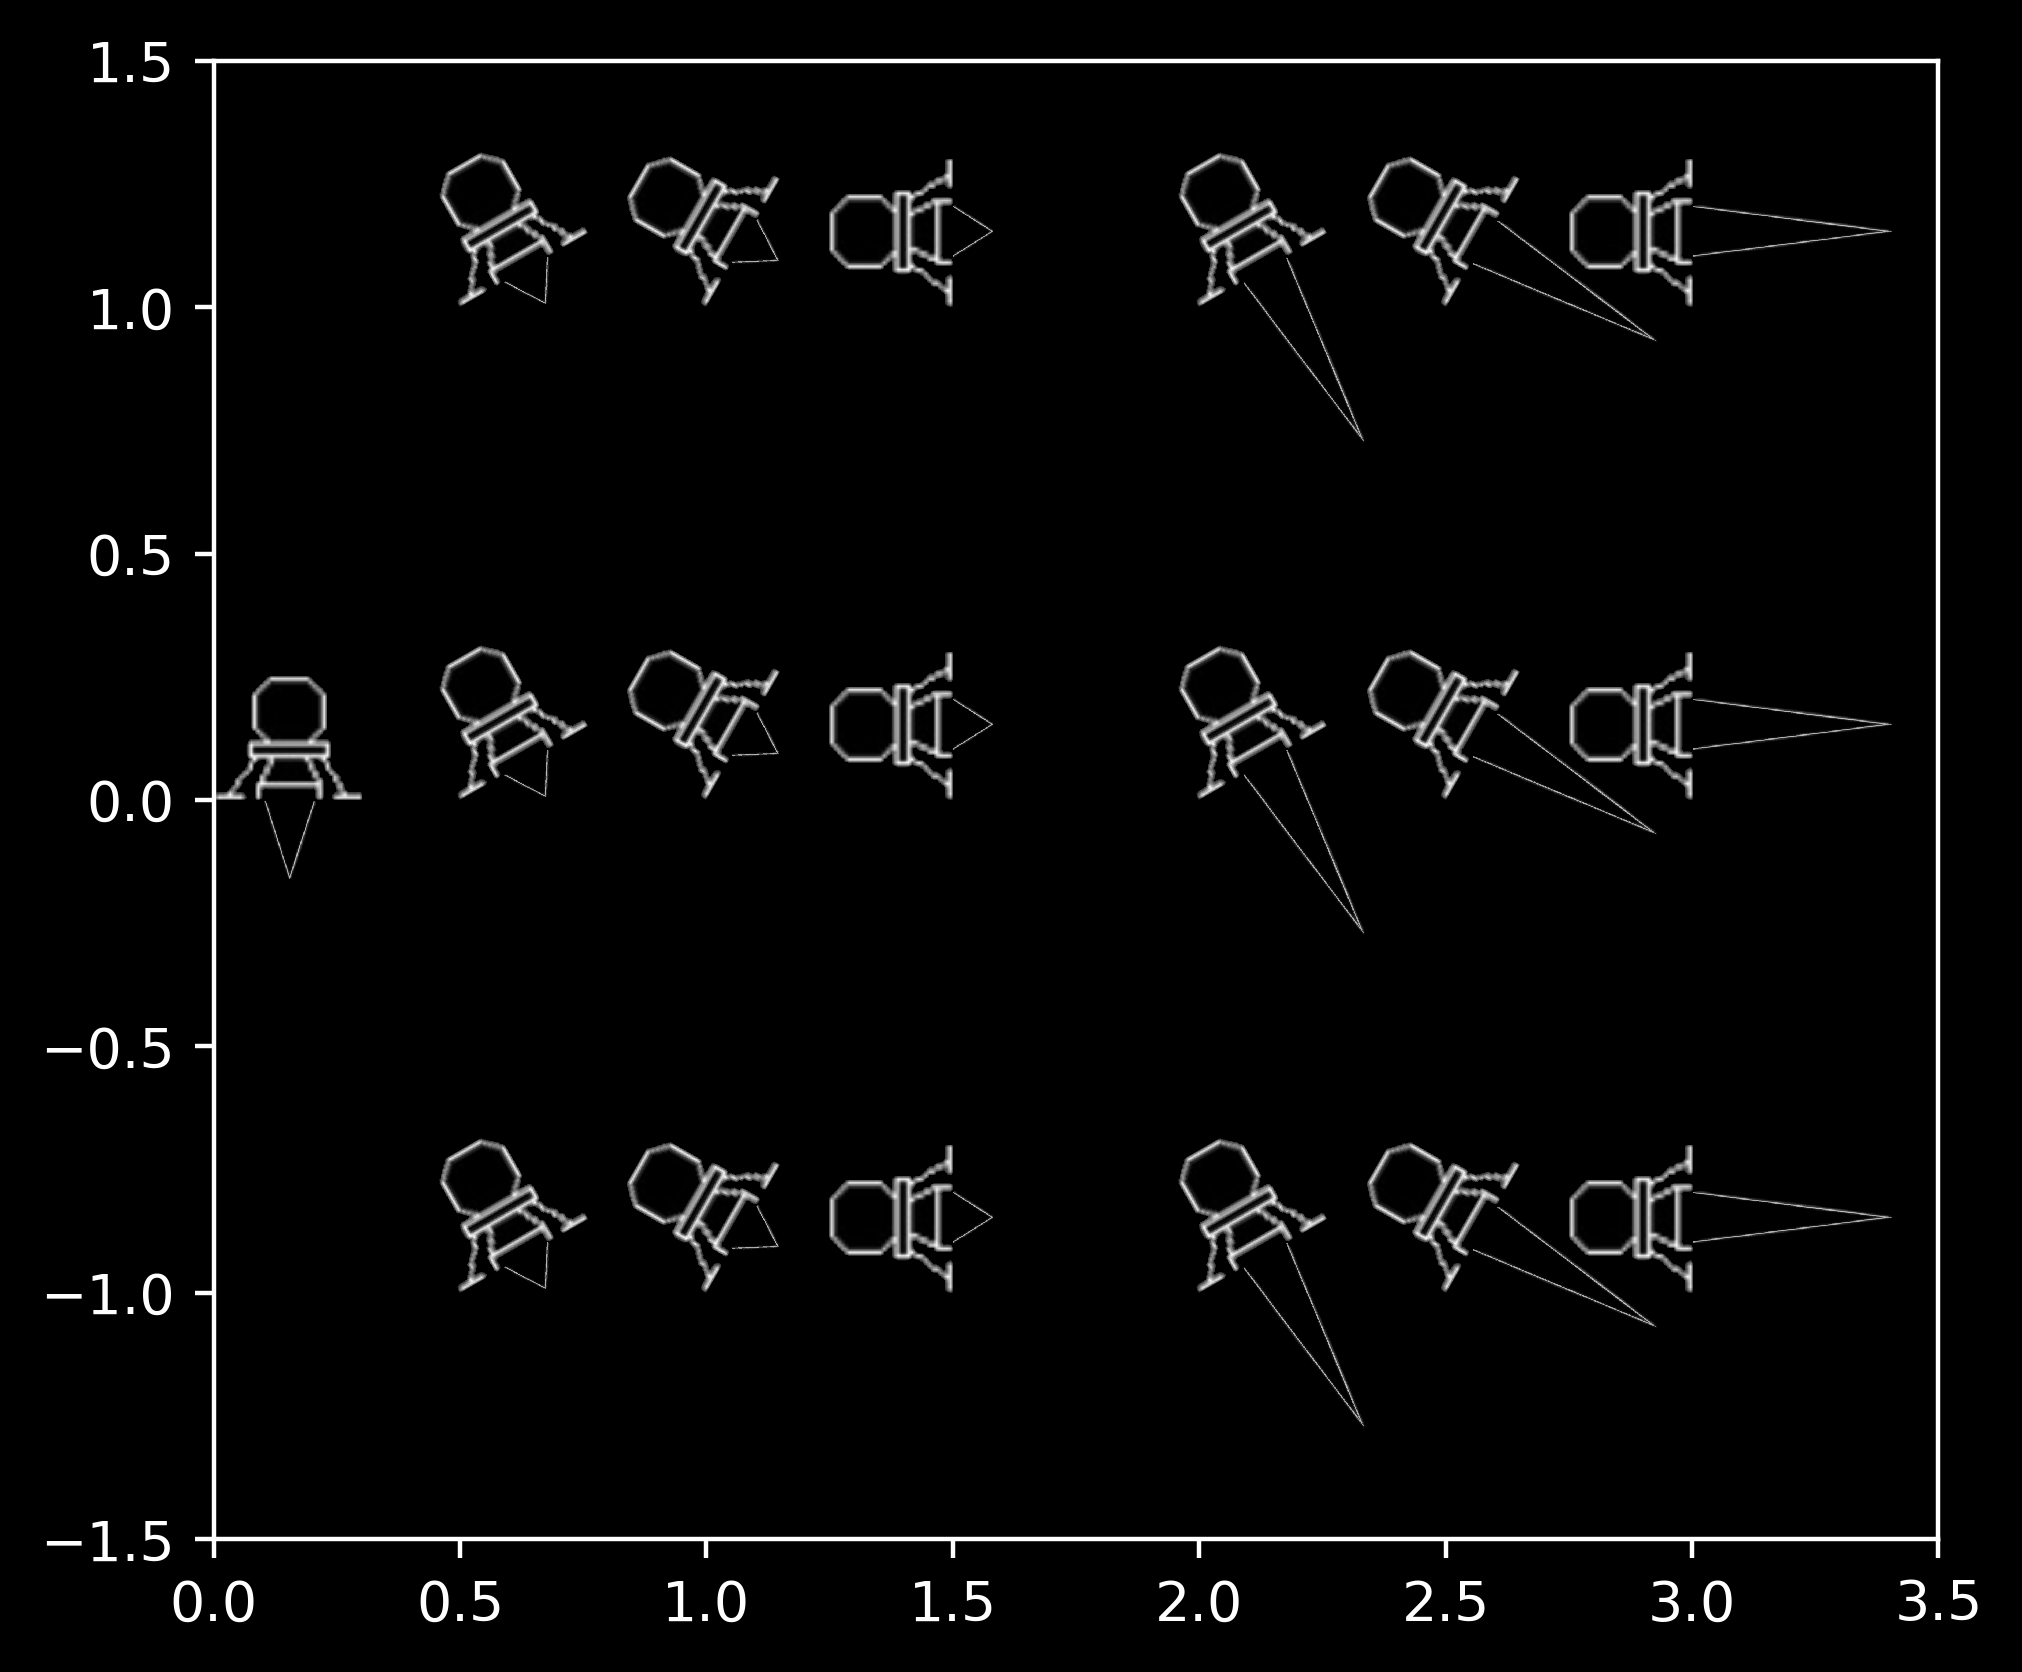

In [11]:
timelapse_test()

In [ ]:
# G_moon = 200 # m/s
altitude = 50. # m
x_pos = 5. # m? (don't think this really matters)
entrance_x_vel = 10. # m/s
pos = (x_pos, altitude)
gamma=0
nu = 5000

new_altitude = 50. # m
new_x_pos = 5. # m? (don't think this really matters)
new_entrance_x_vel = 10. # m/s
new_pos = (new_x_pos, new_altitude)
new_gamma=0
new_nu = 5000

TS, X, Y, XP, YP, UX, UY, TF = lunar_lander(pos, entrance_x_vel, gamma=0, beta=100, nu=5000, t_steps=10000)

In [46]:
def timelapse_test(ts=TS, x=X, y=Y, xp=XP, yp=YP, ux=UX, uy=UY, tf=TF, N=7, width=0.3, alpha=None):
    def get_image(filename='./lander.png'):
        arr = plt.imread(filename)
        return arr

    def imshow_affine(ax, z, *args, **kwargs):
        im = ax.imshow(z, *args, **kwargs)
        x1, x2, y1, y2 = im.get_extent()
        im._image_skew_coordinate = (x2, y1)
        return im

    # load the image
    lander = get_image()
    # thrust = get_image('full_lander_thrust.png')[:, 3:]
    thrust = get_image('full_lander_thrust.png')

    radians = np.arctan2(-ux, uy)
    thrust_mag = np.linalg.norm(np.vstack([UX, UY]), axis=0)
    # thrust_mag = minmax_scale(thrust_mag, (0, 1.5))
    print(thrust_mag.shape)
    trajectory = np.array(list(zip(x, y, radians, thrust_mag)))
    idx = np.round(np.linspace(0, len(trajectory) - 1, N)).astype(int)
    
    trajectory = np.array(trajectory)[idx]
    # max_thrust = np.max(thrust_mag)

    # set the width and height of the image
    image_ratio = lander.shape[0]/lander.shape[1]
    lander_height = width*image_ratio
    # This allows for fading in time
    if alpha is None:
        alpha=1
    else:
        alpha = 0.8*i/len(trajectory)

    # setup the plots
    fig, ax = plt.subplots()
    for i, t in enumerate(trajectory, start=1):
        xi, yi, deg, thrust_mag = t
        # print(xi, yi, deg, thrust)
        thrust_ratio = thrust_mag*(thrust.shape[0]/thrust.shape[1])
        thrust_height = width*thrust_ratio

        im_thrust = imshow_affine(ax, thrust, interpolation='none',
                                  origin='upper',
                                    extent=[0, width, -thrust_height, 0], clip_on=True,
                                    alpha=alpha)
        # center_x, center_y = width//2, thrust_height//2
        center_x, center_y = 0, 0
        # print(center_x, center_y, xi, yi)
        im_thrust_trans = (mtransforms.Affine2D()
                    .rotate_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im_thrust.set_transform(im_thrust_trans)

        # print("thrust info")
        # print(f'center_x:  {center_x}, center_y:  {center_y}, xi: {xi}, yi: {yi}')
        # print(f'width: {width}, height: {thrust_height}')


        im_lander = imshow_affine(ax, lander, interpolation='none',
                        extent=[0, width, 0, lander_height], clip_on=True,
                        alpha=alpha)
        center_x, center_y = width//2, lander_height//2
        # print("lander info")
        # print(f'center_x:  {center_x}, center_y:  {center_y}, xi: {xi}, yi: {yi}')
        # print(f'width: {width}, height: {lander_height}')

        im_lander_trans = (mtransforms.Affine2D()
                    .rotate_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im_lander.set_transform(im_lander_trans)

    ax.set_xlim(np.min(trajectory[:, 0]) - 3*width, np.max(trajectory[:, 0]) + 3*width)
    ax.set_ylim(np.min(trajectory[:, 1]) - 3*lander_height, np.max(trajectory[:, 1]) + 3*lander_height)
    plt.show()

(29998,)


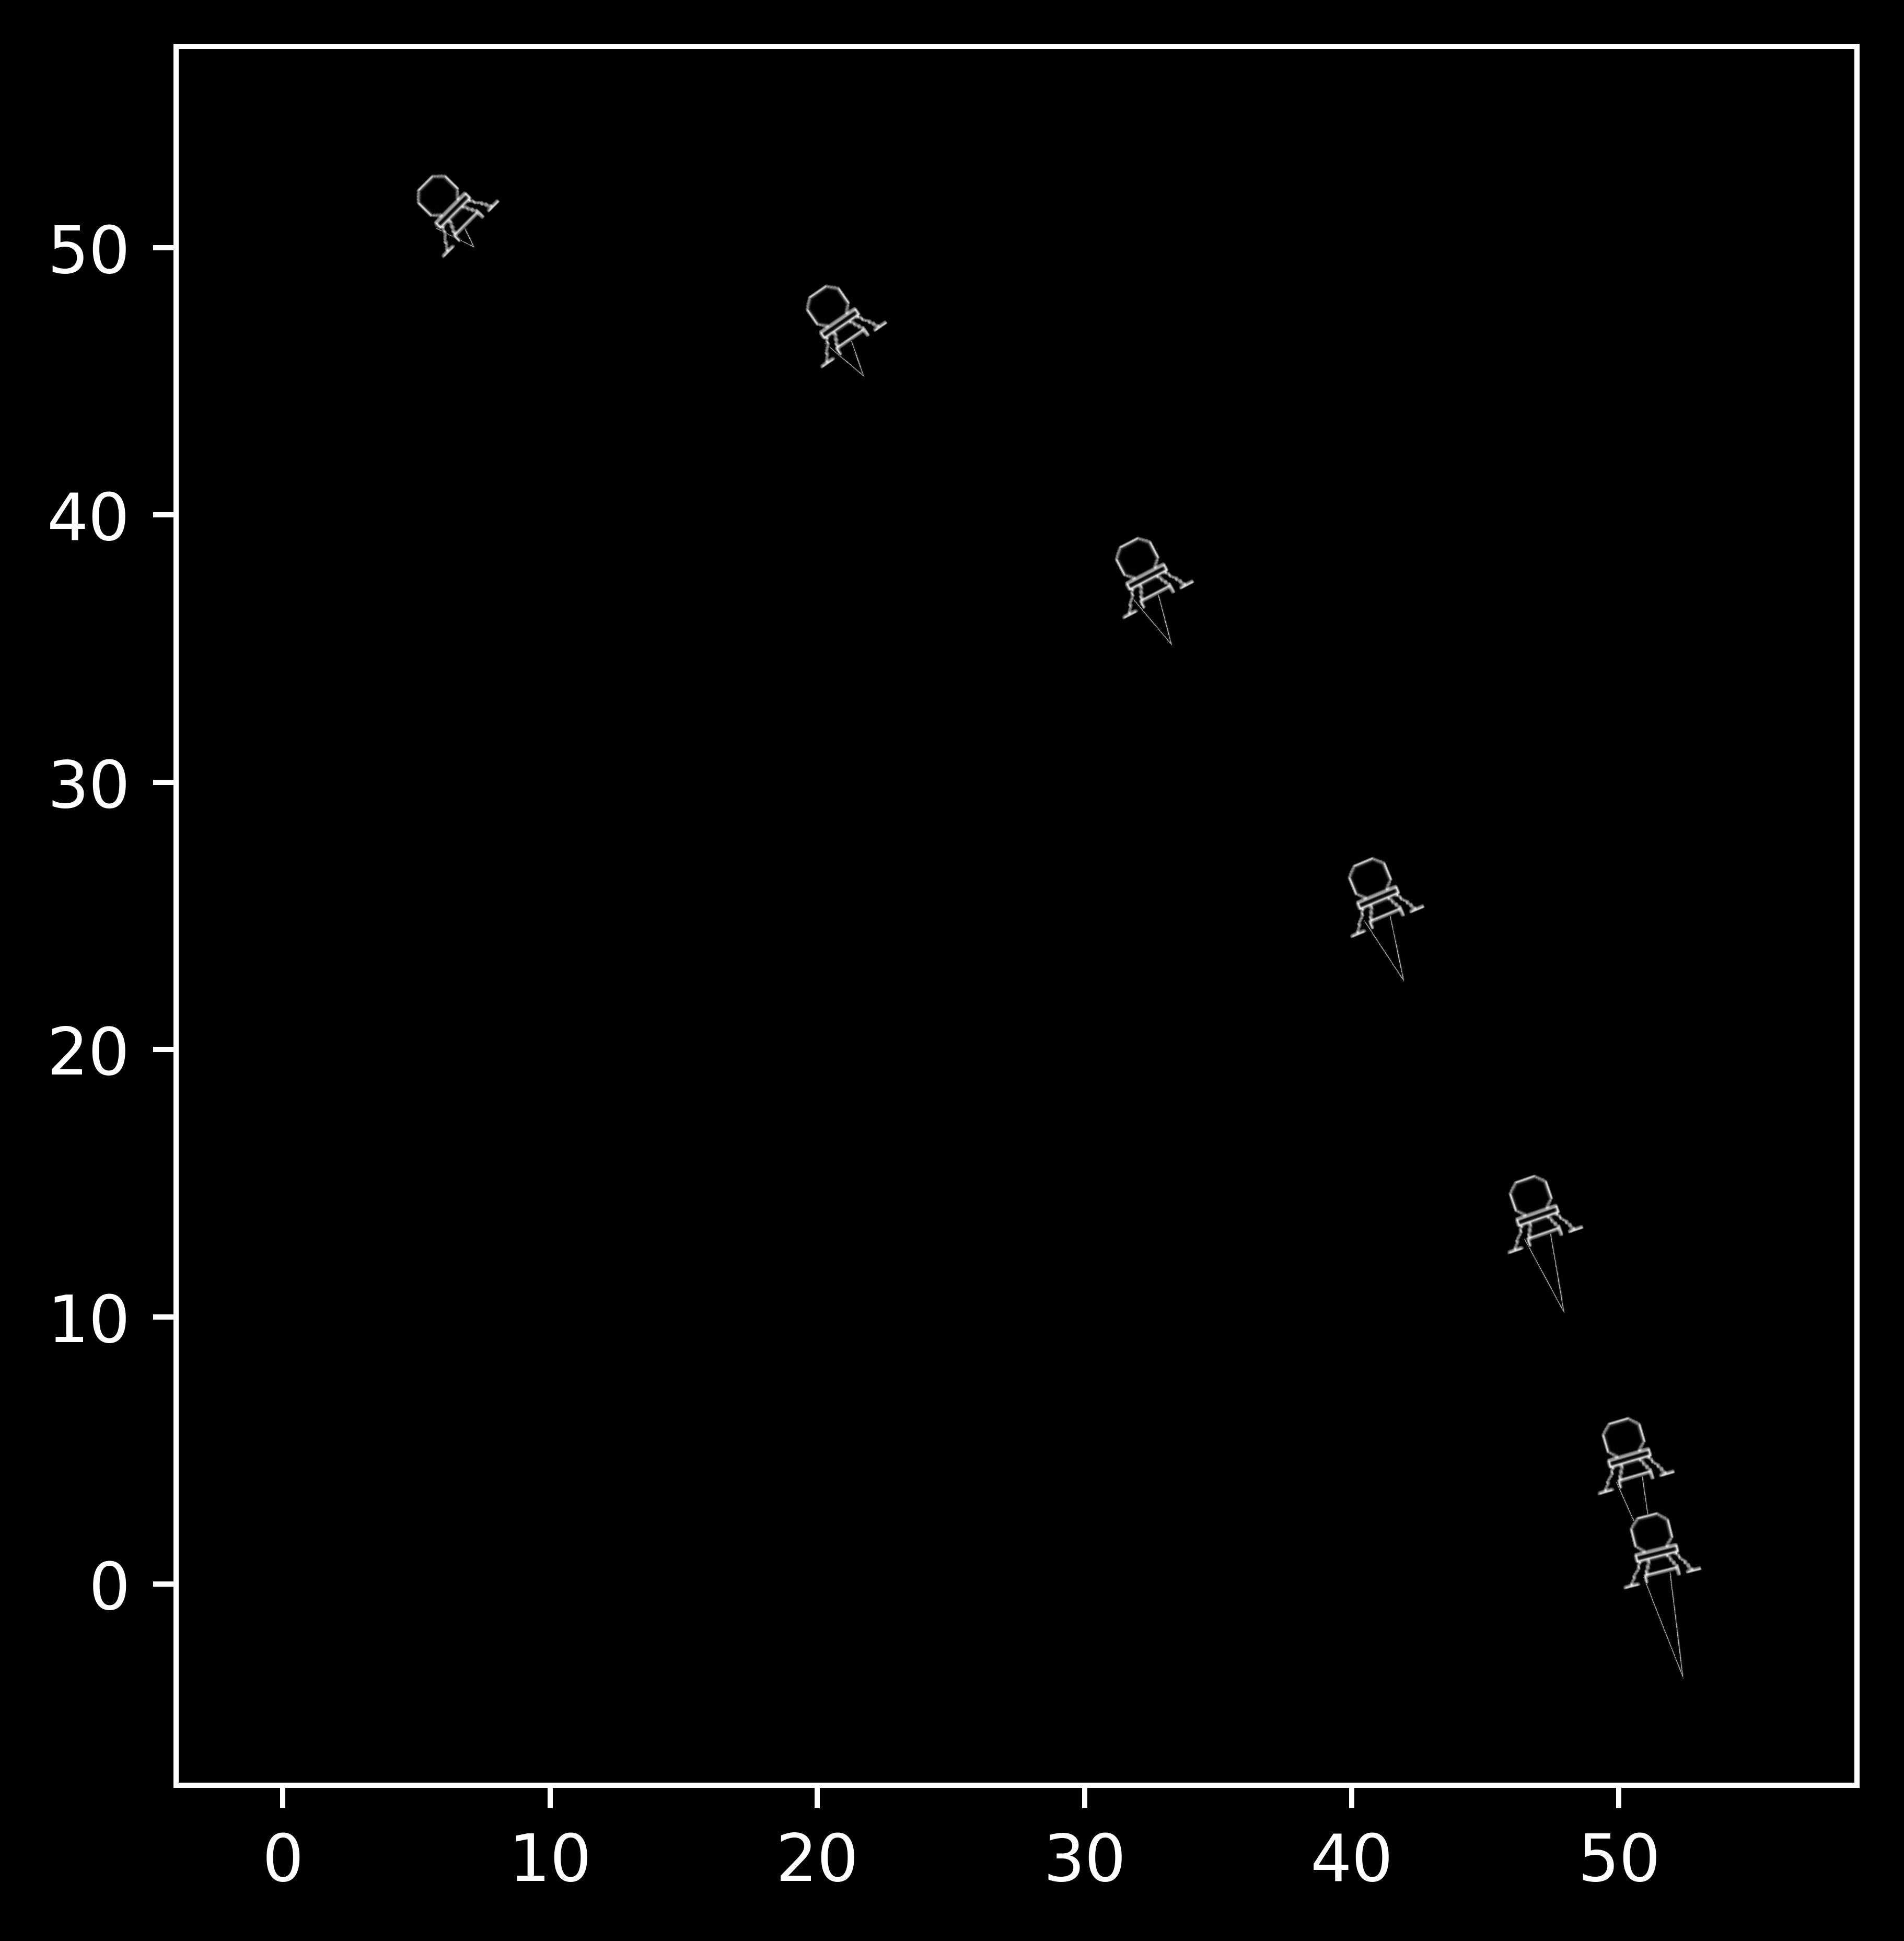

In [48]:
timelapse_test(width=3)